# **UMD CS courses: What do the reviews say?**
*CMSC320 <br>
Professor Morawski, Fall 2022* <br>
*Adam Yang (ayang115@umd.edu)*



At the University of Maryland, students often refer to course creating services such as [courseoff](https://umd.courseoff.com/) or [venus](https://venus.umd.edu/). These services take data from the class repository called [testudo](https://www.testudo.umd.edu) and allows students to create interactive schedules with all information (professor, time, section, etc.) in one convenient location. These services are paired with a UMD based review site known as [planetterp](planetterp.com). Unlike the aforementioned schedule builders, planetterp does not offer a scheduling system: instead, it is a search engine for course grade data, reviews, and professor information. The data is most regularly used to find the 'best' professors teaching a desired course during a term. <br> <br>
Let's take a look at the data for the course CMSC320 - Introduction to Data Science:

> Average GPA: 3.30 <br>
> Fall 2022 Professors: [Maksym Morawsky, Elias Gonzales] <br>
> Prerequisites: Minimum C- in CMSC216 and CMSC250 <br>

Objectives:
* clean data to have professor, course number, grade data, no credits, title, average score
* create sentiment analysis for reviews
* compare sentiment to reviews
* compare grade to reviews
* rank sentiment by rating
* rank grade by rating

Questions:
1. What deems a course to be good?
2. Which professors are the best for each course?
3. What kind of sentiments are present for highly rated professors

### Imports

In [1]:
import planetterp as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

In [2]:
COURSE_REIVEW_COLUMNS = ["professor", "course", "review", "rating", "expected_grade", "created"]
GRADE_WEIGHTS = [4, 4, 3.7, 3.3, 3.0, 2.7, 2.3, 2.0, 1.7, 1.3, 1.0, 0.7, 0.0]
GRADE_LETTERS = ["A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D+", "D", "D-", "F"]
GRADE_LANDW = {"A+" : 4, "A" : 4, "A-" : 3.7, "B+" : 3.3, "B" : 3.0, "B-" : 2.7, "C+" : 2.3, "C" : 2.0, "C-" : 1.7, "D+" : 1.3, "D" : 1.0, "D-" : 0.7, "F" : 0.0}

## **Data** 

### **Retrieve course data**


In order to analyze the course information, we need to get data in some manageable form. 

In [3]:
courses = pd.DataFrame(pt.courses(department="CMSC", reviews=True))

# Take only undergrad courses
courses = courses[courses["course_number"] < "500"]
# Remove duplicate professors for courses
courses["professors"] = courses["professors"].apply(lambda x: np.unique(x))
courses["sub_code"] = courses["course_number"].apply(lambda x: x[3] if len(x) > 3 else 0) 

In [4]:
courses

,average_gpa,professors,reviews,department,course_number,name,title,credits,description,is_recent,sub_code
0,3.199664,"[Adam Porter, Atif Memon, Charles Song, Herve ...","[{'professor': 'Adam Porter', 'course': 'CMSC4...",CMSC,436,CMSC436,Programming Handheld Systems,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True,0
1,2.672616,"[Amol Deshpande, Daniel Abadi, Mihai Pop, Nich...","[{'professor': 'Amol Deshpande', 'course': 'CM...",CMSC,424,CMSC424,Database Design,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True,0
2,3.461364,"[Alyssa Neuner, Amy Vaillancourt, Andrew Nolan...","[{'professor': 'Corie Brown', 'course': 'CMSC1...",CMSC,100,CMSC100,Bits and Bytes of Computer and Information Sci...,1.0,<b>Restriction:</b> For first time freshmen an...,True,0
4,2.449417,"[A.U. Shankar, Alan Sussman, Anwar Mamat, Herv...","[{'professor': 'Nelson Padua-Perez', 'course':...",CMSC,216,CMSC216,Introduction to Computer Systems,4.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True,0
5,2.746843,"[Anwar Mamat, Chau-Wen Tseng, Cliff Bakalian, ...","[{'professor': 'Jeffrey Foster', 'course': 'CM...",CMSC,330,CMSC330,Organization of Programming Languages,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True,0
7,2.380112,"[Ashok Agrawala, Colin Dixon, Ibrahim Korpeogl...","[{'professor': 'Ashok Agrawala', 'course': 'CM...",CMSC,417,CMSC417,Computer Networks,3.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True,0
8,3.152688,[Ben Bederson],[],CMSC,198C,CMSC198C,None,NaN,None,True,C
9,2.651282,[Ben Bederson],[],CMSC,198D,CMSC198D,Special Topics in Computer Science for Non-Maj...,1.0,,True,D
10,0.800000,[Ben Bederson],[],CMSC,198E,CMSC198E,Special Topics in Computer Science for Non-Maj...,1.0,,True,E
11,2.584963,"[Aditya Acharya, Alex Liao, Alexander Brassel,...","[{'professor': 'John Aloimonos', 'course': 'CM...",CMSC,250,CMSC250,Discrete Structures,4.0,<b>Prerequisite:</b> Minimum grade of C- in CM...,True,0


### **Retrieve review data**


In [5]:
reviews = pd.DataFrame(columns=COURSE_REIVEW_COLUMNS)

for course in courses["reviews"]:
    reviews = pd.concat([reviews, pd.DataFrame(course)])

In [6]:
reviews

,professor,course,review,rating,expected_grade,created
0,Adam Porter,CMSC436,Easy class. Open note exams. One big group pro...,5,A-,2018-04-17T03:30:09Z
1,Adam Porter,CMSC436,Easy class but awful professor. He is frequent...,1,A,2018-11-21T01:56:02Z
2,Adam Porter,CMSC436,Totally ineffective as a lecturer. He reads fr...,1,B,2018-12-11T02:04:39Z
3,Adam Porter,CMSC436,"Porter responds to few, if any questions asked...",1,,2018-12-11T21:02:42Z
4,Adam Porter,CMSC436,436 was a fun class for me due to the subject ...,2,B,2019-12-18T16:10:39Z
...,...,...,...,...,...,...
8,William Pugh,CMSC132H,"Pugh is a really interesting professor, and re...",3,A+,2008-05-20T15:37:00Z
9,Chau-Wen Tseng,CMSC132H,"He's a little idiosyncratic, but his class is ...",4,B,2007-11-30T13:09:00Z
10,James Purtilo,CMSC132H,Purtilo is a solid professor who respects his ...,4,A+,2012-03-19T13:59:00Z
11,James Purtilo,CMSC132H,DO NOT TAKE HIM FOR CMSC132 OR ANY INTRO-LEVEL...,5,,2010-10-19T02:22:00Z


### **Retrieve grades**

Get grade data by class and professor. Uses [UMD grade weighting](https://www.testudo.umd.edu/gpa/index.html), excluding W (waived) grades in calculation)

In [7]:
def get_grades(course: str, professor: str):
    grades = pd.DataFrame(pt.grades(course=course, professor=professor))
   
    if grades.empty: return -1
   
    students = 0
    gpa = []
    
    for letter in GRADE_LANDW.keys():
        no_students = np.sum(grades[letter])
        students += no_students
        gpa.append(no_students * GRADE_LANDW[letter])
    
    if students == 0:
        return -1
    
    return np.mean(np.sum(gpa) / students)

grades = pd.DataFrame(columns=["course", "professor", "average_gpa"])
for index, course in courses.iterrows():
    for professor in course["professors"]:
        print(professor, course["name"])
        grade_data = pd.DataFrame([[course["name"], professor, get_grades(course["name"], professor)]], columns=["course", "professor", "average_gpa"])
        grades = pd.concat([grade_data, grades]).reset_index(drop=True)

In [8]:
grades = pd.read_csv("data/grades.csv")
grades.drop("Unnamed: 0", axis=1, inplace=True)

In [9]:
grades.head()

,course,professor,average_gpa
0,CMSC498Z,Ming Lin,3.847619
1,CMSC498Z,Ashok Agrawala,-1.000000
2,CMSC498I,Larry Davis,3.407500
3,CMSC498I,Ian Miers,-1.000000
4,CMSC498Y,Erin Molloy,3.500000


### **Clean and combine** 

In [10]:
cdf = grades.copy()

def get_reviews(row):
    course_reviews = reviews.loc[(reviews["professor"]==row["professor"]) & (reviews["course"]==row["course"]), :]
    if course_reviews.empty:
        return np.nan
    else:
        return course_reviews

cdf["course_reviews"] = cdf.apply(get_reviews, axis=1)

In [11]:
def get_no_reviews(row):
    if row["course_reviews"] is not np.nan:
        return len(row["course_reviews"].index)
    else: 
        return -1

cdf["no_reviews"] = cdf.apply(get_no_reviews, axis=1)

In [12]:
def get_course_rating(row):
    if row["course_reviews"] is not np.nan:
        return np.sum(row["course_reviews"]["rating"]) / row["no_reviews"]
    else: 
        return -1

cdf["rating"] = cdf.apply(get_course_rating, axis=1)

In [13]:
cdf

,course,professor,average_gpa,course_reviews,no_reviews,rating
0,CMSC498Z,Ming Lin,3.847619,NaN,-1,-1.0
1,CMSC498Z,Ashok Agrawala,-1.000000,NaN,-1,-1.0
2,CMSC498I,Larry Davis,3.407500,NaN,-1,-1.0
3,CMSC498I,Ian Miers,-1.000000,NaN,-1,-1.0
4,CMSC498Y,Erin Molloy,3.500000,NaN,-1,-1.0
...,...,...,...,...,...,...
346,CMSC436,Michael Marsh,3.473148,professor course ...,2,4.0
347,CMSC436,Herve Franceschi,-1.000000,NaN,-1,-1.0
348,CMSC436,Charles Song,3.111950,NaN,-1,-1.0
349,CMSC436,Atif Memon,3.460902,NaN,-1,-1.0


### **Description of Data**

For this project, data regarding UMD courses is used. Using the [Planetterp API](https://planetterp.com/api/#tag/Search/operation/Search), course information was extracted into a dataframe. <br>
<br>
Course Information:<br>
Grouped by term, course information includes instructors, department, course code, course title, number of credits, prerequisites, course recency, and a dictionary containing reviews. For the purposes of this project, only undergraduate computer science courses (courses with heading CMSC and coded with value 500 or less) were studied.

## **Data Analysis**

### **Rating Vs GPA**

<AxesSubplot:title={'center':'rating vs. class gpa'}, xlabel='average_gpa', ylabel='rating'>

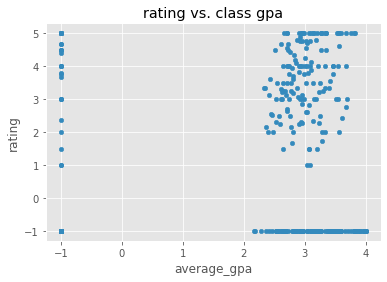

In [14]:
cdf.plot.scatter("average_gpa", "rating", title="rating vs. class gpa")

We observe that there are numerous course and professor matchings that either have no GPA data or no ratings. This often occurs with courses that, compared to core courses such as CMSC216 or CMSC250, have lower student volume.  

In [15]:
cdf = cdf.loc[(cdf["average_gpa"] != -1) & (cdf["rating"] > 0), :]

We will instead take a look at courses with gpa data and more than 10 reviews. This will hopefully give us a cleaner sample with larger classes and thus a higher volume of reviews.

<AxesSubplot:title={'center':'rating vs. gpa'}, xlabel='average_gpa', ylabel='rating'>

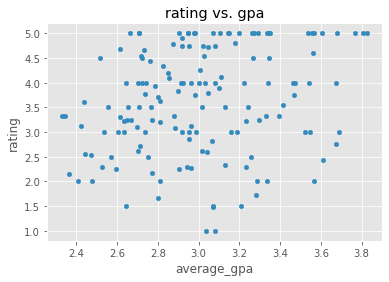

In [16]:
cdf.plot.scatter("average_gpa", "rating", title="rating vs. gpa")

Seems scattered, lets take the averages instead.

<AxesSubplot:xlabel='average_gpa', ylabel='rating'>

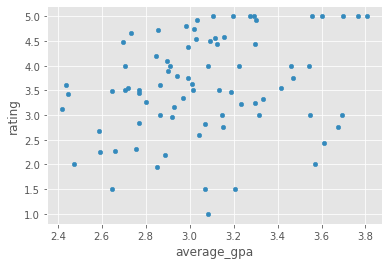

In [17]:
cdf.groupby("professor").mean().plot.scatter("average_gpa", "rating")

<AxesSubplot:xlabel='average_gpa', ylabel='rating'>

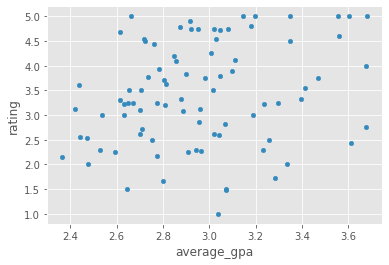

In [18]:
cdf = cdf.loc[cdf["no_reviews"] > 3, :]
cdf.plot.scatter("average_gpa", "rating")

### **Highly rated vs low rated**

In [19]:
low = cdf.loc[cdf["rating"] < 2]
high = cdf.loc[cdf["rating"] > 3]
avg = cdf.loc[(cdf["rating"] <= 3) & (cdf["rating"] >= 2)]

<BarContainer object of 3 artists>

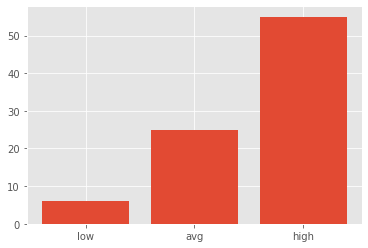

In [20]:
plt.bar(x=["low", "avg", "high"], height=[len(low), len(avg), len(high)])

Text(0.5, 1.0, 'Rating Distributions')

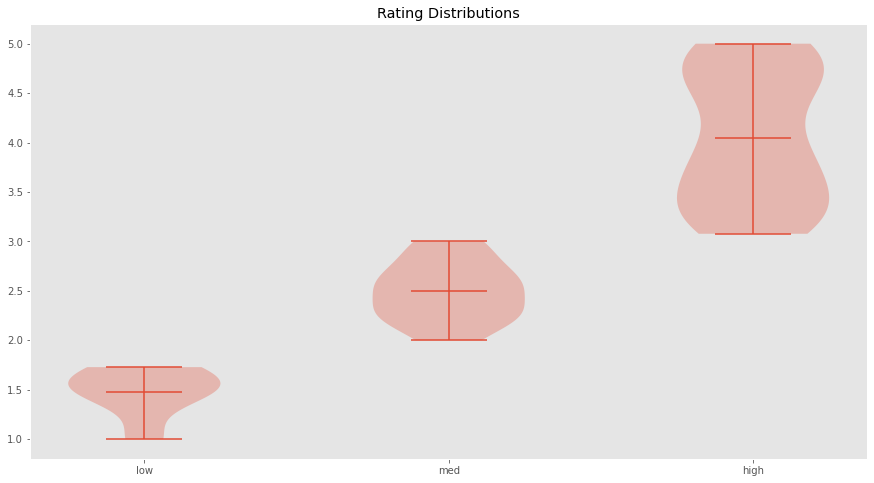

In [21]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.violinplot([low["rating"], avg["rating"], high["rating"]], [1, 2 ,3], widths=0.5, showmeans=True)
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['low', 'med', 'high'])
ax.grid(False)
ax.set_title("Rating Distributions")

## **Hypothesis Testing**

## **Language Processing**

In [22]:
import nltk 
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [23]:
stop_words = set(stopwords.words('english'))
textt = " ".join(review for review in reviews.review)
wc = WordCloud(stopwords=stop_words).generate(textt)

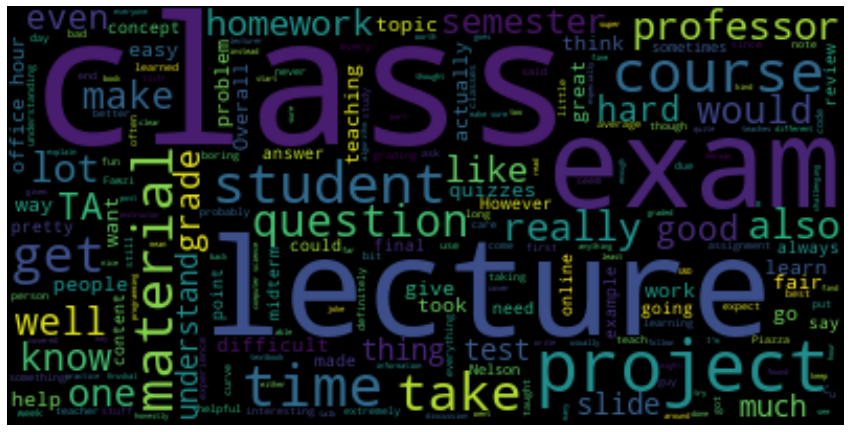

In [24]:
fig = plt.figure(figsize =(15, 10))

plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()